In [1]:
# %matplotlib widget
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from models.kinematic.ideal_diff_drive import Ideal_diff_drive

In [2]:
df = pd.read_csv("snow_train.csv", dtype={'': int, 'ros_time': np.int64, 'joy_switch': str, 'icp_index': int, 'calib_state': str, 'estop': str, 'cmd_left_vel': float, 'meas_left_vel': float, 'cmd_right_vel': float, 'meas_right_vel': float, 'cmd_vel_x': float, 'cmd_vel_omega': float, 'icp_pos_x': float, 'icp_pos_y': float, 'icp_pos_z': float, 'icp_quat_x': float, 'icp_quat_y': float, 'icp_quat_z': float, 'icp_quat_w': float, 'voltage_left' : float, 'current_left': float, 'voltage_right': float, 'current_right': float, 'imu_x': float, 'imu_y': float, 'imu_z': float})
time = (df["ros_time"][1:] - df["ros_time"][1:].iloc[0]) / 1e9
cmd_left_vel = df["cmd_left_vel"][1:]
cmd_right_vel = df["cmd_right_vel"][1:]
model = Ideal_diff_drive(0.3, 1.1652, 0.05)
cmd_vel_x, cmd_vel_omega = model.compute_body_vel(np.vstack([cmd_left_vel, cmd_right_vel]))

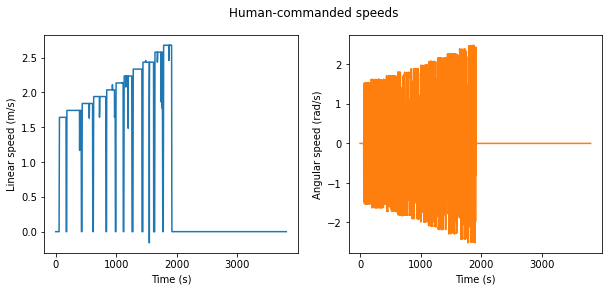

In [3]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].plot(time, cmd_vel_x, color="C0")
ax[0].set_xlabel("Time (s)")
ax[0].set_ylabel("Linear speed (m/s)")
ax[1].plot(time, cmd_vel_omega, color="C1")
ax[1].set_xlabel("Time (s)")
ax[1].set_ylabel("Angular speed (rad/s)")
fig.suptitle("Human-commanded speeds")
plt.show()

In [4]:
train_dataset = pd.read_pickle("../.././../data/ral2023_dataset/warthog_wheels/gravel_1/acceleration_dataset.pkl")
# train_dataset = pd.read_pickle("../.././../data/ral2023_dataset/husky/boreal_snow/acceleration_dataset.pkl")
train_dataset_2 = pd.read_pickle("../.././../data/ral2023_dataset/warthog_tracks/grand-axe_crusted-snow/acceleration_dataset.pkl")

# train_dataset = pd.read_pickle("../.././../data/ral2023_dataset/husky/grand_salon_tile_inflated/acceleration_dataset.pkl")
# train_dataset_2 = pd.read_pickle("../.././../data/ral2023_dataset/husky/boreal_snow/acceleration_dataset.pkl")

# extract cmd_body_vel arrays (input arrays)

idd_body_vel_x_str_list = []
idd_body_vel_y_str_list = []
idd_body_vel_yaw_str_list = []
for i in range(0, 40):
    str_idd_vel_x_i = 'idd_vel_x_' + str(i)
    str_idd_vel_y_i = 'idd_vel_y_' + str(i)
    str_idd_vel_yaw_i = 'idd_vel_yaw_' + str(i)
    idd_body_vel_x_str_list.append(str_idd_vel_x_i)
    idd_body_vel_y_str_list.append(str_idd_vel_y_i)
    idd_body_vel_yaw_str_list.append(str_idd_vel_yaw_i)
idd_body_vel_x_array = train_dataset[idd_body_vel_x_str_list].to_numpy()
idd_body_vel_y_array = train_dataset[idd_body_vel_y_str_list].to_numpy()
idd_body_vel_yaw_array = train_dataset[idd_body_vel_yaw_str_list].to_numpy()

idd_vel_x_array_tracks = train_dataset_2[idd_body_vel_x_str_list].to_numpy()
idd_vel_y_array_tracks = train_dataset_2[idd_body_vel_y_str_list].to_numpy()
idd_vel_yaw_array_tracks = train_dataset_2[idd_body_vel_yaw_str_list].to_numpy()

x_train = np.column_stack((idd_body_vel_x_array.flatten(), idd_body_vel_yaw_array.flatten()))

wheel_radius = 0.3
baseline = 1.1652
ideal_diff_drive = Ideal_diff_drive(wheel_radius, baseline, dt=0.05)
encoder_left_str_list = []
encoder_right_str_list = []
for i in range(0, 40):
    str_encoder_left_i = 'left_wheel_vel_' + str(i)
    str_encoder_right_i = 'right_wheel_vel_' + str(i)
    encoder_left_str_list.append(str_encoder_left_i)
    encoder_right_str_list.append(str_encoder_right_i)
encoder_left_vels = train_dataset[encoder_left_str_list].to_numpy()
encoder_right_vels = train_dataset[encoder_right_str_list].to_numpy()
encoder_body_vel_x = np.zeros((encoder_left_vels.shape[0], 40))
encoder_body_vel_yaw = np.zeros((encoder_left_vels.shape[0], 40))
for i in range(0, encoder_left_vels.shape[0]):
    for j in range(0, 40):
        body_vel = ideal_diff_drive.compute_body_vel(np.array([encoder_left_vels[i,j], encoder_right_vels[i, j]]))
        encoder_body_vel_x[i,j] = body_vel[0]
        encoder_body_vel_yaw[i,j] = body_vel[1]

# extract icp vels

str_icp_vel_x_list = []
str_icp_vel_y_list = []
str_icp_vel_yaw_list = []
for i in range(0, 40):
    str_icp_vel_x_i = 'icp_vel_x_' + str(i)
    str_icp_vel_y_i = 'icp_vel_y_' + str(i)
    str_icp_vel_yaw_i = 'icp_vel_yaw_' + str(i)
    str_icp_vel_x_list.append(str_icp_vel_x_i)
    str_icp_vel_y_list.append(str_icp_vel_y_i)
    str_icp_vel_yaw_list.append(str_icp_vel_yaw_i)
icp_vel_x_array = train_dataset[str_icp_vel_x_list].to_numpy()
icp_vel_y_array = train_dataset[str_icp_vel_y_list].to_numpy()
icp_vel_yaw_array = train_dataset[str_icp_vel_yaw_list].to_numpy()

icp_vel_x_array_tracks = train_dataset_2[str_icp_vel_x_list].to_numpy()
icp_vel_y_array_tracks = train_dataset_2[str_icp_vel_y_list].to_numpy()
icp_vel_yaw_array_tracks = train_dataset_2[str_icp_vel_yaw_list].to_numpy()

# extract body_vel_distruptions arrays (output arrays)

str_body_vel_disturption_x_list = []
str_body_vel_disturption_y_list = []
str_body_vel_disturption_yaw_list = []
for i in range(0, 40):
    str_body_vel_disturption_x_i = 'body_vel_disturption_x_' + str(i)
    str_body_vel_disturption_y_i = 'body_vel_disturption_y_' + str(i)
    str_body_vel_disturption_yaw_i = 'body_vel_disturption_yaw_' + str(i)
    str_body_vel_disturption_x_list.append(str_body_vel_disturption_x_i)
    str_body_vel_disturption_y_list.append(str_body_vel_disturption_y_i)
    str_body_vel_disturption_yaw_list.append(str_body_vel_disturption_yaw_i)

body_vel_disturption_x_array = train_dataset[str_body_vel_disturption_x_list].to_numpy()
body_vel_disturption_y_array = train_dataset[str_body_vel_disturption_y_list].to_numpy()
body_vel_disturption_yaw_array = train_dataset[str_body_vel_disturption_yaw_list].to_numpy()

y_train_longitudinal_slip = body_vel_disturption_x_array.flatten()
y_train_lateral_slip = body_vel_disturption_y_array.flatten()
y_train_angular_slip = body_vel_disturption_yaw_array.flatten()

# compute mean body vel disturbance for each steady-state window
n_windows = len(train_dataset)

steady_state_mask = train_dataset['steady_state_mask'].to_numpy() == True
steady_state_mask_tracks = train_dataset_2['steady_state_mask'].to_numpy() == True

steady_state_idd_body_vel_x = idd_body_vel_x_array[steady_state_mask]
steady_state_idd_body_vel_y = idd_body_vel_y_array[steady_state_mask]
steady_state_idd_body_vel_yaw = idd_body_vel_yaw_array[steady_state_mask]

steady_state_idd_body_vel_x_tracks = idd_vel_x_array_tracks[steady_state_mask_tracks]
steady_state_idd_body_vel_y_tracks = idd_vel_y_array_tracks[steady_state_mask_tracks]
steady_state_idd_body_vel_yaw_tracks = idd_vel_yaw_array_tracks[steady_state_mask_tracks]

steady_state_encoder_body_vel_x = encoder_body_vel_x[steady_state_mask]
steady_state_encoder_body_vel_yaw = encoder_body_vel_yaw[steady_state_mask]

steady_state_icp_body_vel_x = icp_vel_x_array[steady_state_mask]
steady_state_icp_body_vel_y = icp_vel_y_array[steady_state_mask]
steady_state_icp_body_vel_yaw = icp_vel_yaw_array[steady_state_mask]

steady_state_icp_body_vel_x_tracks = icp_vel_x_array_tracks[steady_state_mask_tracks]
steady_state_icp_body_vel_y_tracks = icp_vel_y_array_tracks[steady_state_mask_tracks]
steady_state_icp_body_vel_yaw_tracks = icp_vel_yaw_array_tracks[steady_state_mask_tracks]

steady_state_body_vel_disturption_x = body_vel_disturption_x_array[steady_state_mask]
steady_state_body_vel_disturption_y = body_vel_disturption_y_array[steady_state_mask]
steady_state_body_vel_disturption_yaw = body_vel_disturption_yaw_array[steady_state_mask]



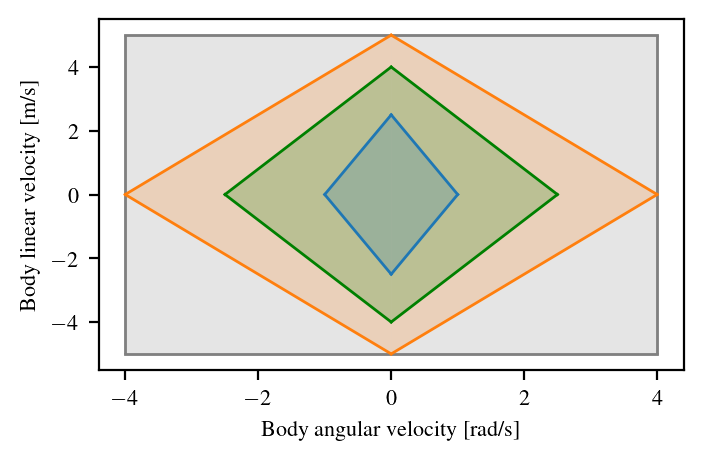

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib as mpl


plt.rc('font', family='serif', serif='Times')
plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
plt.rc('axes', labelsize=8)
mpl.rcParams['lines.dashed_pattern'] = [2, 2]
mpl.rcParams['lines.linewidth'] = 1.0

width  = 3.402
height = width / 1.3
plt.close('all')
fig, ax = plt.subplots(1, 1, dpi=200)
fig.set_size_inches(width, height)
# fig.subplots_adjust(left=.1, bottom=0.07, right=.995, top=.98)
fig.subplots_adjust(top=0.99, bottom=0.32, right=.99, left=0.13)

x_min = -4
x_max = 4
y_min = -5
y_max = 5

minimum_linear_vel_positive = 0
minimum_linear_vel_negative = 0
minimum_angular_vel_positive = 0
minimum_angular_vel_negative = 0
maximum_linear_vel_positive = 5
maximum_linear_vel_negative = -5
maximum_angular_vel_positive = 4
maximum_angular_vel_negative = -4
gravel_maximum_linear_vel_positive = 4
gravel_maximum_linear_vel_negative = -4
gravel_maximum_angular_vel_positive = 2.5
gravel_maximum_angular_vel_negative = -2.5
snow_maximum_linear_vel_positive = 2.5
snow_maximum_linear_vel_negative = -2.5
snow_maximum_angular_vel_positive = 1
snow_maximum_angular_vel_negative = -1
human_maximum_linear_vel_positive = 5
human_maximum_linear_vel_negative = 0
human_maximum_angular_vel_positive = 2
human_maximum_angular_vel_negative = -2

num_points = 100
line_width = 1
alpha = 0.2
cmd_angular_vel_linspace = np.linspace(x_min, x_max, num_points)
cmd_linear_max_vel_linspace = np.linspace(y_max, y_max, num_points)
cmd_linear_min_vel_linspace = np.linspace(y_min, y_min, num_points)

## plot initial input space
ax.plot(cmd_angular_vel_linspace, cmd_linear_min_vel_linspace, color='grey', lw=line_width, label='Uncharacterized')
ax.plot(cmd_angular_vel_linspace, cmd_linear_max_vel_linspace, color='grey', lw=line_width)
ax.vlines(x_min, y_min, y_max, color='grey', lw=line_width)
ax.vlines(x_max, y_min, y_max, color='grey', lw=line_width)
ax.fill_between(cmd_angular_vel_linspace, cmd_linear_max_vel_linspace, y2=cmd_linear_min_vel_linspace, alpha=alpha, color='grey')

char_angular_vel_linspace_negative = np.linspace(maximum_angular_vel_negative, 0, int(num_points / 2)).flatten()
char_angular_vel_linspace_positive = np.linspace(0, maximum_angular_vel_positive, int(num_points / 2)).flatten()
char_q1_vel_linspace = np.linspace(0, maximum_linear_vel_positive, int(num_points / 2)).flatten()
char_q2_vel_linspace = np.linspace(maximum_linear_vel_positive, 0, int(num_points / 2)).flatten()
char_q3_vel_linspace = np.linspace(maximum_linear_vel_negative, 0, int(num_points / 2)).flatten()
char_q4_vel_linspace = np.linspace(0, maximum_linear_vel_negative, int(num_points / 2)).flatten()

# plot characterized input space
q1_char_input_space = ax.plot(char_angular_vel_linspace_negative, char_q1_vel_linspace, color='C1', lw=line_width, label='Characterized')
q2_char_input_space = ax.plot(char_angular_vel_linspace_positive, char_q2_vel_linspace, color='C1', lw=line_width)
q3_char_input_space = ax.plot(char_angular_vel_linspace_positive, char_q3_vel_linspace, color='C1', lw=line_width)
q4_char_input_space = ax.plot(char_angular_vel_linspace_negative, char_q4_vel_linspace, color='C1', lw=line_width)
ax.fill_between(char_angular_vel_linspace_negative, char_q1_vel_linspace, y2=char_q4_vel_linspace, alpha=alpha, color='C1', lw=0)
ax.fill_between(char_angular_vel_linspace_positive, char_q2_vel_linspace, y2=char_q3_vel_linspace, alpha=alpha, color='C1', lw=0)

gravel_angular_vel_linspace_negative = np.linspace(gravel_maximum_angular_vel_negative, 0, int(num_points / 2)).flatten()
gravel_angular_vel_linspace_positive = np.linspace(0, gravel_maximum_angular_vel_positive, int(num_points / 2)).flatten()
gravel_q1_vel_linspace = np.linspace(0, gravel_maximum_linear_vel_positive, int(num_points / 2)).flatten()
gravel_q2_vel_linspace = np.linspace(gravel_maximum_linear_vel_positive, 0, int(num_points / 2)).flatten()
gravel_q3_vel_linspace = np.linspace(gravel_maximum_linear_vel_negative, 0, int(num_points / 2)).flatten()
gravel_q4_vel_linspace = np.linspace(0, gravel_maximum_linear_vel_negative, int(num_points / 2)).flatten()

# plot characterized gravel
q1_gravel_input_space = ax.plot(gravel_angular_vel_linspace_negative, gravel_q1_vel_linspace, color='green', lw=line_width, label='Characterized')
q2_gravel_input_space = ax.plot(gravel_angular_vel_linspace_positive, gravel_q2_vel_linspace, color='green', lw=line_width)
q3_gravel_input_space = ax.plot(gravel_angular_vel_linspace_positive, gravel_q3_vel_linspace, color='green', lw=line_width)
q4_gravel_input_space = ax.plot(gravel_angular_vel_linspace_negative, gravel_q4_vel_linspace, color='green', lw=line_width)
ax.fill_between(gravel_angular_vel_linspace_negative, gravel_q1_vel_linspace, y2=gravel_q4_vel_linspace, alpha=alpha, color='green', lw=0)
ax.fill_between(gravel_angular_vel_linspace_positive, gravel_q2_vel_linspace, y2=gravel_q3_vel_linspace, alpha=alpha, color='green', lw=0)

snow_angular_vel_linspace_negative = np.linspace(snow_maximum_angular_vel_negative, 0, int(num_points / 2)).flatten()
snow_angular_vel_linspace_positive = np.linspace(0, snow_maximum_angular_vel_positive, int(num_points / 2)).flatten()
snow_q1_vel_linspace = np.linspace(0, snow_maximum_linear_vel_positive, int(num_points / 2)).flatten()
snow_q2_vel_linspace = np.linspace(snow_maximum_linear_vel_positive, 0, int(num_points / 2)).flatten()
snow_q3_vel_linspace = np.linspace(snow_maximum_linear_vel_negative, 0, int(num_points / 2)).flatten()
snow_q4_vel_linspace = np.linspace(0, snow_maximum_linear_vel_negative, int(num_points / 2)).flatten()

# plot characterized snow
q1_snow_input_space = ax.plot(snow_angular_vel_linspace_negative, snow_q1_vel_linspace, color='C0', lw=line_width, label='Characterized')
q2_snow_input_space = ax.plot(snow_angular_vel_linspace_positive, snow_q2_vel_linspace, color='C0', lw=line_width)
q3_snow_input_space = ax.plot(snow_angular_vel_linspace_positive, snow_q3_vel_linspace, color='C0', lw=line_width)
q4_snow_input_space = ax.plot(snow_angular_vel_linspace_negative, snow_q4_vel_linspace, color='C0', lw=line_width)
ax.fill_between(snow_angular_vel_linspace_negative, snow_q1_vel_linspace, y2=snow_q4_vel_linspace, alpha=alpha, color='C0', lw=0)
ax.fill_between(snow_angular_vel_linspace_positive, snow_q2_vel_linspace, y2=snow_q3_vel_linspace, alpha=alpha, color='C0', lw=0)

human_angular_vel_linspace_negative = np.linspace(human_maximum_angular_vel_negative, 0, int(num_points / 2)).flatten()
human_angular_vel_linspace_positive = np.linspace(0, human_maximum_angular_vel_positive, int(num_points / 2)).flatten()
human_angular_vel_linspace_all = np.linspace(human_maximum_angular_vel_negative, human_maximum_angular_vel_positive, int(num_points / 2)).flatten()
human_q1_vel_linspace = np.linspace(human_maximum_linear_vel_positive, 0, int(num_points / 2)).flatten()
human_q2_vel_linspace = np.linspace(0, human_maximum_linear_vel_positive, int(num_points / 2)).flatten()

# plot human
# q1_human_input_space = ax.plot(human_angular_vel_linspace_negative, human_q1_vel_linspace, color='C3', lw=line_width, label='Characterized')
# q2_human_input_space = ax.plot(human_angular_vel_linspace_positive, human_q2_vel_linspace, color='C3', lw=line_width)
# q2_human_input_space = ax.plot(human_angular_vel_linspace_all, np.full(int(num_points/2), human_maximum_linear_vel_positive), color='C3', lw=line_width)
# ax.fill_between(human_angular_vel_linspace_negative, human_maximum_linear_vel_positive, y2=human_q1_vel_linspace, alpha=alpha, color='C3')
# ax.fill_between(human_angular_vel_linspace_positive, human_maximum_linear_vel_positive, y2=human_q2_vel_linspace, alpha=alpha, color='C3')

# plot icp velocities
# for i in range(steady_state_idd_body_vel_yaw.shape[0]):
#     if abs(np.median(steady_state_icp_body_vel_x[i]) - steady_state_idd_body_vel_x[i][0]) > 2.5:
#         continue
#     ax.scatter(steady_state_encoder_body_vel_yaw[i], steady_state_encoder_body_vel_x[i], s=1, color="C1", alpha=0.01)
#     ax.scatter(steady_state_icp_body_vel_yaw[i], steady_state_icp_body_vel_x[i], s=1, color="green", alpha=0.01)

    # ax.quiver(steady_state_idd_body_vel_yaw[i][0], steady_state_idd_body_vel_x[i][0], np.median(steady_state_icp_body_vel_yaw[i]) - steady_state_idd_body_vel_yaw[i][0], np.median(steady_state_icp_body_vel_x[i]) - steady_state_idd_body_vel_x[i][0], angles='xy', scale_units='xy', scale=1, width=0.03, headwidth=5, headlength=3, headaxislength=3, minlength=1, minshaft=1, units='xy', color="C3", alpha=0.5)
    # for j in range(steady_state_idd_body_vel_yaw.shape[1]):
        # ax.quiver(steady_state_idd_body_vel_yaw[i][j], steady_state_idd_body_vel_x[i][j], steady_state_icp_body_vel_yaw[i][j] - steady_state_idd_body_vel_yaw[i][j], steady_state_icp_body_vel_x[i][j] - steady_state_idd_body_vel_x[i][j], angles='xy', scale_units='xy', scale=1, width=0.03, headwidth=3, headlength=1, headaxislength=1, minlength=1, minshaft=1, units='xy', alpha=0.1)

# for i in range(steady_state_icp_body_vel_x_tracks.shape[0]):
#     ax.scatter(steady_state_icp_body_vel_yaw_tracks[i], steady_state_icp_body_vel_x_tracks[i], s=1, color="C0", alpha=0.01)

# plot humand-commanded velocities
# ax.scatter(cmd_vel_omega, cmd_vel_x, s=1, color="red", alpha=0.03)

legend_elements = [Rectangle((0,0), width=5, height=3, facecolor="grey", label='Naive', linestyle='solid', edgecolor='k'),                          Rectangle((0,0), width=5, height=3, facecolor="C3", label='Human', linestyle='solid', edgecolor='k'),
                   Rectangle((0,0), width=5, height=3, facecolor="C1", label='Powertrain', linestyle='solid', edgecolor='k'),
                  # Rectangle((0,0), width=5, height=3, facecolor="gray", label='Human', linestyle='solid', edgecolor='k'),
                  #  Rectangle((0,0), width=5, height=3, facecolor="C3", label='Doughnut', linestyle='solid', edgecolor='k'),
                  Rectangle((0,0), width=5, height=3, facecolor="green", label='Gravel', linestyle='solid', edgecolor='k'),
                  Rectangle((0,0), width=5, height=3, facecolor="C0", label='Snow', linestyle='solid', edgecolor='k'), ]
ax.set_xlabel("Body angular velocity [rad/s]")
ax.set_ylabel("Body linear velocity [m/s]")

# fig.legend(handles=legend_elements, loc="lower center", bbox_to_anchor=(0.5, -0.02), ncol=3)
fig.savefig("fig.pdf", dpi=500)
fig.savefig("fig.jpg", dpi=500)
plt.show()

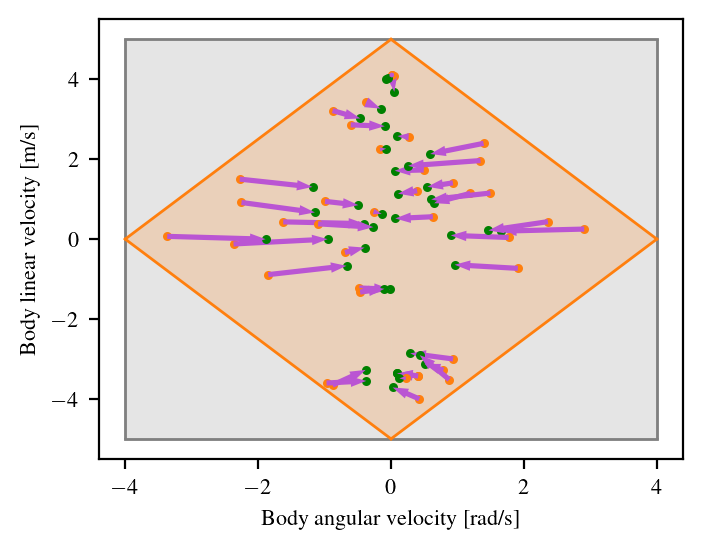

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib as mpl
from matplotlib import animation


plt.rc('font', family='serif', serif='Times')
plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
plt.rc('axes', labelsize=8)
mpl.rcParams['lines.dashed_pattern'] = [2, 2]
mpl.rcParams['lines.linewidth'] = 1.0
mpl.rcParams['xtick.labelsize'] = 8

width  = 3.402
height = width / 1.3
plt.close('all')
fig, ax = plt.subplots(1, 1, dpi=200)
fig.set_size_inches(width, height)
# fig.subplots_adjust(left=.1, bottom=0.07, right=.995, top=.98)
fig.subplots_adjust(top=0.99, bottom=0.15, right=.99, left=0.13)

x_min = -4
x_max = 4
y_min = -5
y_max = 5

minimum_linear_vel_positive = 0
minimum_linear_vel_negative = 0
minimum_angular_vel_positive = 0
minimum_angular_vel_negative = 0
maximum_linear_vel_positive = 5
maximum_linear_vel_negative = -5
maximum_angular_vel_positive = 4
maximum_angular_vel_negative = -4
gravel_maximum_linear_vel_positive = 4
gravel_maximum_linear_vel_negative = -4
gravel_maximum_angular_vel_positive = 2.5
gravel_maximum_angular_vel_negative = -2.5
snow_maximum_linear_vel_positive = 2.5
snow_maximum_linear_vel_negative = -2.5
snow_maximum_angular_vel_positive = 1
snow_maximum_angular_vel_negative = -1
human_maximum_linear_vel_positive = 5
human_maximum_linear_vel_negative = 0
human_maximum_angular_vel_positive = 2
human_maximum_angular_vel_negative = -2

num_points = 100
line_width = 1
alpha = 0.2
cmd_angular_vel_linspace = np.linspace(x_min, x_max, num_points)
cmd_linear_max_vel_linspace = np.linspace(y_max, y_max, num_points)
cmd_linear_min_vel_linspace = np.linspace(y_min, y_min, num_points)

## plot initial input space
ax.plot(cmd_angular_vel_linspace, cmd_linear_min_vel_linspace, color='grey', lw=line_width, label='Uncharacterized')
ax.plot(cmd_angular_vel_linspace, cmd_linear_max_vel_linspace, color='grey', lw=line_width)
ax.vlines(x_min, y_min, y_max, color='grey', lw=line_width)
ax.vlines(x_max, y_min, y_max, color='grey', lw=line_width)
ax.fill_between(cmd_angular_vel_linspace, cmd_linear_max_vel_linspace, y2=cmd_linear_min_vel_linspace, alpha=alpha, color='grey')

char_angular_vel_linspace_negative = np.linspace(maximum_angular_vel_negative, 0, int(num_points / 2)).flatten()
char_angular_vel_linspace_positive = np.linspace(0, maximum_angular_vel_positive, int(num_points / 2)).flatten()
char_q1_vel_linspace = np.linspace(0, maximum_linear_vel_positive, int(num_points / 2)).flatten()
char_q2_vel_linspace = np.linspace(maximum_linear_vel_positive, 0, int(num_points / 2)).flatten()
char_q3_vel_linspace = np.linspace(maximum_linear_vel_negative, 0, int(num_points / 2)).flatten()
char_q4_vel_linspace = np.linspace(0, maximum_linear_vel_negative, int(num_points / 2)).flatten()

# plot characterized input space
q1_char_input_space = ax.plot(char_angular_vel_linspace_negative, char_q1_vel_linspace, color='C1', lw=line_width, label='Characterized')
q2_char_input_space = ax.plot(char_angular_vel_linspace_positive, char_q2_vel_linspace, color='C1', lw=line_width)
q3_char_input_space = ax.plot(char_angular_vel_linspace_positive, char_q3_vel_linspace, color='C1', lw=line_width)
q4_char_input_space = ax.plot(char_angular_vel_linspace_negative, char_q4_vel_linspace, color='C1', lw=line_width)
ax.fill_between(char_angular_vel_linspace_negative, char_q1_vel_linspace, y2=char_q4_vel_linspace, alpha=alpha, color='C1', lw=0)
ax.fill_between(char_angular_vel_linspace_positive, char_q2_vel_linspace, y2=char_q3_vel_linspace, alpha=alpha, color='C1', lw=0)

gravel_angular_vel_linspace_negative = np.linspace(gravel_maximum_angular_vel_negative, 0, int(num_points / 2)).flatten()
gravel_angular_vel_linspace_positive = np.linspace(0, gravel_maximum_angular_vel_positive, int(num_points / 2)).flatten()
gravel_q1_vel_linspace = np.linspace(0, gravel_maximum_linear_vel_positive, int(num_points / 2)).flatten()
gravel_q2_vel_linspace = np.linspace(gravel_maximum_linear_vel_positive, 0, int(num_points / 2)).flatten()
gravel_q3_vel_linspace = np.linspace(gravel_maximum_linear_vel_negative, 0, int(num_points / 2)).flatten()
gravel_q4_vel_linspace = np.linspace(0, gravel_maximum_linear_vel_negative, int(num_points / 2)).flatten()


# plot characterized gravel
# q1_gravel_input_space = ax.plot(gravel_angular_vel_linspace_negative, gravel_q1_vel_linspace, color='green', lw=line_width, label='Characterized')
# q2_gravel_input_space = ax.plot(gravel_angular_vel_linspace_positive, gravel_q2_vel_linspace, color='green', lw=line_width)
# q3_gravel_input_space = ax.plot(gravel_angular_vel_linspace_positive, gravel_q3_vel_linspace, color='green', lw=line_width)
# q4_gravel_input_space = ax.plot(gravel_angular_vel_linspace_negative, gravel_q4_vel_linspace, color='green', lw=line_width)
# ax.fill_between(gravel_angular_vel_linspace_negative, gravel_q1_vel_linspace, y2=gravel_q4_vel_linspace, alpha=alpha, color='green', lw=0)
# ax.fill_between(gravel_angular_vel_linspace_positive, gravel_q2_vel_linspace, y2=gravel_q3_vel_linspace, alpha=alpha, color='green', lw=0)


# for i in range(steady_state_icp_body_vel_x_tracks.shape[0]):
#     ax.scatter(steady_state_icp_body_vel_yaw_tracks[i], steady_state_icp_body_vel_x_tracks[i], s=1, color="C0", alpha=0.01)

# plot humand-commanded velocities
# ax.scatter(cmd_vel_omega, cmd_vel_x, s=1, color="red", alpha=0.03)

legend_elements = [Rectangle((0,0), width=5, height=3, facecolor="grey", label='Naive', linestyle='solid', edgecolor='k'),                          Rectangle((0,0), width=5, height=3, facecolor="C3", label='Human', linestyle='solid', edgecolor='k'),
                   Rectangle((0,0), width=5, height=3, facecolor="C1", label='Powertrain', linestyle='solid', edgecolor='k'),
                  # Rectangle((0,0), width=5, height=3, facecolor="gray", label='Human', linestyle='solid', edgecolor='k'),
                  #  Rectangle((0,0), width=5, height=3, facecolor="C3", label='Doughnut', linestyle='solid', edgecolor='k'),
                  Rectangle((0,0), width=5, height=3, facecolor="green", label='Gravel', linestyle='solid', edgecolor='k'),
                  Rectangle((0,0), width=5, height=3, facecolor="C0", label='Snow', linestyle='solid', edgecolor='k'), ]
ax.set_xlabel(r"Body angular velocity [rad/s]")
ax.set_ylabel(r"Body linear velocity [m/s]")

cmd_vel_mask_1 = np.abs(steady_state_idd_body_vel_x*steady_state_idd_body_vel_yaw)<=3.5
cmd_vel_mask_2 = np.abs(steady_state_idd_body_vel_yaw) <= 3.5
cmd_vel_mask = (cmd_vel_mask_1) & (cmd_vel_mask_2)

masked_idd_vel_x = steady_state_idd_body_vel_x[cmd_vel_mask]
masked_idd_vel_yaw = steady_state_idd_body_vel_yaw[cmd_vel_mask]
masked_icp_vel_x = steady_state_icp_body_vel_x[cmd_vel_mask]
masked_icp_vel_yaw = steady_state_icp_body_vel_yaw[cmd_vel_mask]

def update(frame):
    ax.scatter(masked_idd_vel_yaw[frame], masked_idd_vel_x[frame], c='C1', s=5)
    ax.scatter(masked_icp_vel_yaw[frame], masked_icp_vel_x[frame], c='green', s=5)
    ax.quiver(masked_idd_vel_yaw[frame], masked_idd_vel_x[frame], masked_icp_vel_yaw[frame] - masked_idd_vel_yaw[frame], masked_icp_vel_x[frame] - masked_idd_vel_x[frame], color='mediumorchid', angles='xy', scale_units='xy', scale=1, width=0.1, headwidth=2, headlength=3, headaxislength=3, minlength=1, minshaft=1, units='xy')
    
ani = animation.FuncAnimation(fig=fig, func=update, frames=range(0, 3360, int(3360/40)), interval=30)
# ani = animation.FuncAnimation(fig=fig, func=update, frames=range(0, 200, int(200/80)), interval=30)
ani.save('../../anim/warthog_doughnut_input-space.mp4', fps=1.5, dpi=500)

# fig.legend(handles=legend_elements, loc="lower center", bbox_to_anchor=(0.5, -0.02), ncol=3)
# fig.savefig("fig.pdf", dpi=100)
# fig.savefig("fig.jpg")
# plt.show()

In [ ]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 8}
plt.rc('font', **font)
width  = 3.402
height = width
plt.close('all')
fig, ax = plt.subplots(1, 1, dpi=200)
fig.set_size_inches(width, height)
# fig.subplots_adjust(left=.1, bottom=0.07, right=.995, top=.98)
fig.subplots_adjust(top=0.99, bottom=0.24, right=.99, left=0.13)

ax.scatter(steady_state_idd_body_vel_yaw_tracks, steady_state_icp_body_vel_yaw_tracks, s=1, label='wheels_gravel')
ax.scatter(steady_state_idd_body_vel_yaw, steady_state_icp_body_vel_yaw, s=1, label='tracks_crusted-snow')

ax.vlines([-4, 4], -3, 3, color='k', ls='--')

# ax.set_aspect('equal')

plt.legend()

plt.xlabel('commanded angular vel [rad/s]')
plt.ylabel('measured angular vel [rad/s]')